In [2]:
import warnings
warnings.filterwarnings(action='ignore')

**3주차 데이터 수집**

**1. 데이터 다운로드**

In [3]:
from pathlib import Path
import pandas as pd

mpg=pd.read_csv(Path("dataset/auto-mpg-data.csv"))

**2. 데이터 구조 훑어보기**

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin,car_name
0,18.0,8,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,NaN,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,NaN,10.5,70,1,ford torino


In [5]:
mpg = mpg.drop(['car_name'], axis=1, inplace=False)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin
0,18.0,8,307.0,130,3504.0,12.0,70,1
1,15.0,8,350.0,165,3693.0,11.5,70,1
2,18.0,8,318.0,150,3436.0,11.0,70,1
3,16.0,8,304.0,150,NaN,12.0,70,1
4,17.0,8,302.0,140,NaN,10.5,70,1


In [6]:
mpg['origin'].replace({1:'USA', 2:'EU', 3:'JPN'},inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin
0,18.0,8,307.0,130,3504.0,12.0,70,USA
1,15.0,8,350.0,165,3693.0,11.5,70,USA
2,18.0,8,318.0,150,3436.0,11.0,70,USA
3,16.0,8,304.0,150,NaN,12.0,70,USA
4,17.0,8,302.0,140,NaN,10.5,70,USA


In [7]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        392 non-null    float64
 5   acceration    398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [8]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          6
acceration      0
model_year      0
origin          0
dtype: int64

In [9]:
median_weight = mpg["weight"].median()
median_weight

2789.5

In [10]:
mpg["weight"].fillna(median_weight, inplace = True)

In [11]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceration      0
model_year      0
origin          0
dtype: int64

In [12]:
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'], errors='coerce')
mpg['horsepower'].dtypes

dtype('int64')

In [13]:
mpg["origin"].value_counts()

USA    249
JPN     79
EU      70
Name: origin, dtype: int64

In [14]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.178392,2959.708543,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.294837,843.799242,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.500000,2789.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3573.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [15]:
# 추가 코드 – 고해상도 PNG로 그림을 저장하는 코드

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

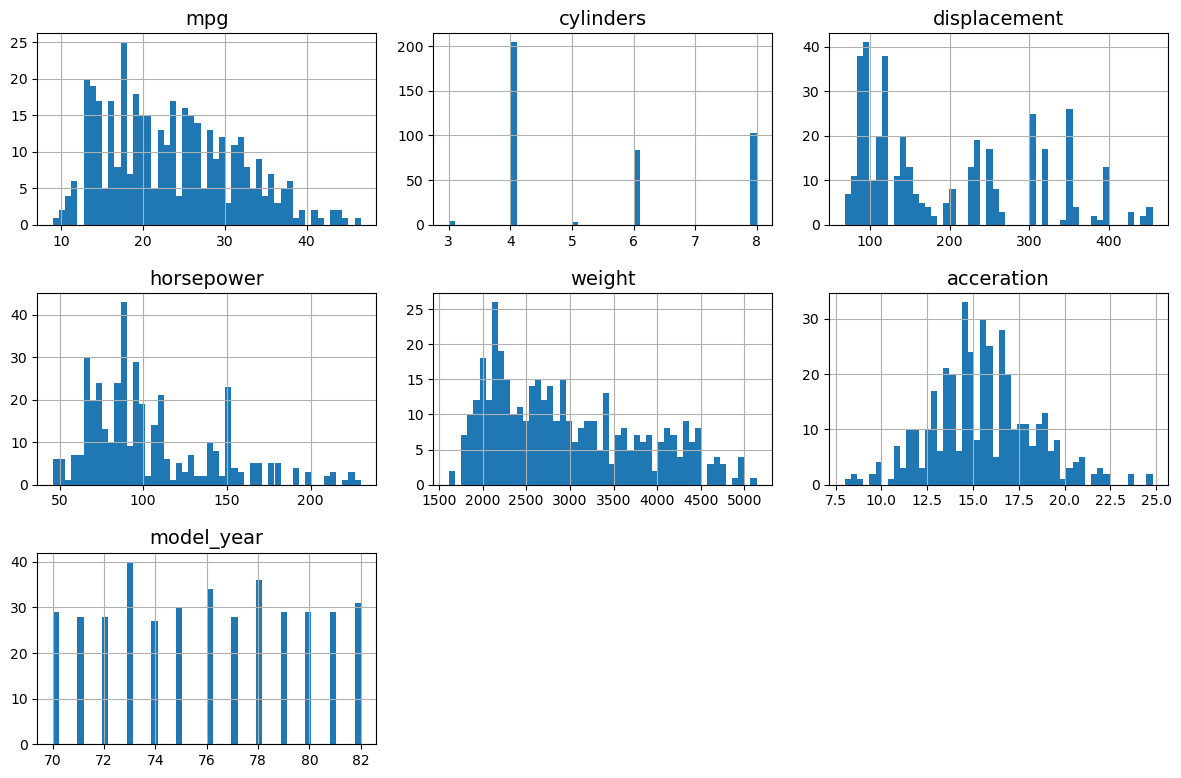

In [16]:
import matplotlib.pyplot as plt

# 추가코드 – 아래 5 라인은 기본 글꼴 크기등을 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

mpg.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # 추가 코드
plt.show()

**1.3 데이터 세트 만들기**

In [17]:
# 코드 2-2
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = shuffle_and_split_data(mpg, 0.2)
len(train_set)

319

In [19]:
len(test_set)

79

In [20]:
np.random.seed(42)

In [21]:
# <코드 2-3>
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mpg, test_size=0.2, random_state=42)

In [22]:
# <코드 2-4>
mpg["acceration_cat"] = pd.cut(mpg["acceration"],
                               bins=[7.5, 12, 14, 16.2, 19, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [23]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin,acceration_cat
0,18.0,8,307.0,130,3504.0,12.0,70,USA,1
1,15.0,8,350.0,165,3693.0,11.5,70,USA,1
2,18.0,8,318.0,150,3436.0,11.0,70,USA,1
3,16.0,8,304.0,150,2789.5,12.0,70,USA,1
4,17.0,8,302.0,140,2789.5,10.5,70,USA,1


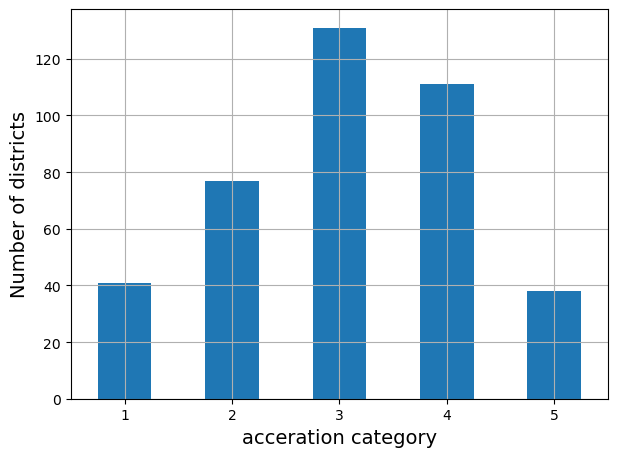

In [24]:
mpg["acceration_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("acceration category")
plt.ylabel("Number of districts")
save_fig("car_acceration_cat_bar_plot")  # extra code
plt.show()

In [25]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   mpg             398 non-null    float64 
 1   cylinders       398 non-null    int64   
 2   displacement    398 non-null    float64 
 3   horsepower      398 non-null    int64   
 4   weight          398 non-null    float64 
 5   acceration      398 non-null    float64 
 6   model_year      398 non-null    int64   
 7   origin          398 non-null    object  
 8   acceration_cat  398 non-null    category
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.6+ KB


In [26]:
# <코드 2-5>
strat_train_set, strat_test_set = train_test_split(
    mpg, test_size=0.2, stratify = mpg['acceration_cat'], random_state=42)

In [27]:
strat_train_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin,acceration_cat
359,28.1,4,141.0,80,3230.0,20.4,81,EU,5
109,21.0,4,140.0,72,2401.0,19.5,73,USA,5
125,20.0,6,198.0,95,3102.0,16.5,74,USA,4
304,37.3,4,91.0,69,2130.0,14.7,79,EU,3
381,36.0,4,107.0,75,2205.0,14.5,82,JPN,3


In [28]:
strat_test_set["acceration_cat"].value_counts() / len(strat_test_set)

3    0.325
4    0.275
2    0.200
1    0.100
5    0.100
Name: acceration_cat, dtype: float64

In [29]:
# 추가 코드 - 계층  샘플링과 순수한 무작위 샘플링의 편향 비교 
def acceration_cat_proportions(data):
    return data["acceration_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(mpg, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": acceration_cat_proportions(mpg),
    "Stratified %": acceration_cat_proportions(strat_test_set),
    "Random %": acceration_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,10.30,10.0,11.25,-2.93,9.21
2,19.35,20.0,22.50,3.38,16.30
3,32.91,32.5,32.50,-1.26,-1.26
4,27.89,27.5,27.50,-1.40,-1.40
5,9.55,10.0,6.25,4.74,-34.54


In [30]:
# <코드 2-6>
for set_ in (strat_train_set, strat_test_set):
    set_.drop("acceration_cat", axis=1, inplace=True)
    
mpg = strat_train_set.copy()

In [31]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin
359,28.1,4,141.0,80,3230.0,20.4,81,EU
109,21.0,4,140.0,72,2401.0,19.5,73,USA
125,20.0,6,198.0,95,3102.0,16.5,74,USA
304,37.3,4,91.0,69,2130.0,14.7,79,EU
381,36.0,4,107.0,75,2205.0,14.5,82,JPN


**4주차 데이터 이해를 위한 탐색과 시각화**

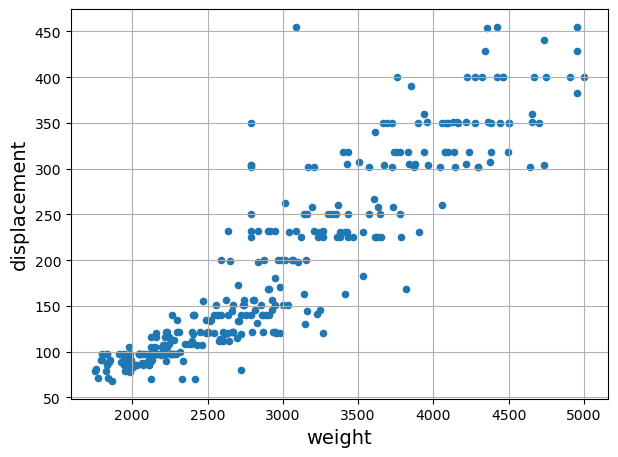

In [32]:
mpg.plot(kind="scatter", x="weight", y="displacement", grid=True)
save_fig("bad_visualization_plot")  # 그림 저장
plt.show()

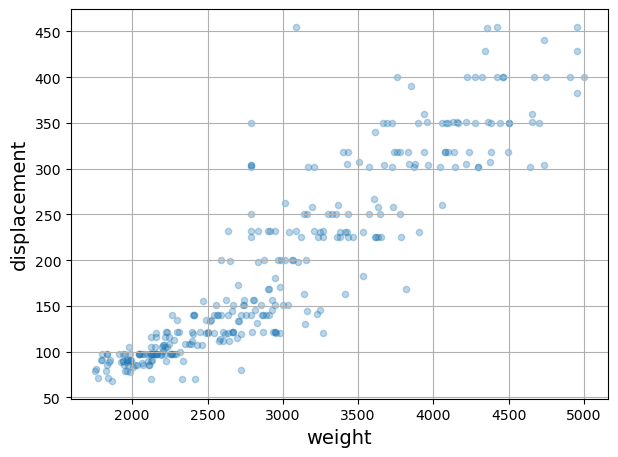

In [33]:
mpg.plot(kind="scatter", x="weight", y="displacement",grid=True, alpha=0.3)
save_fig("better_visualization_plot")  # 그림저장
plt.show()

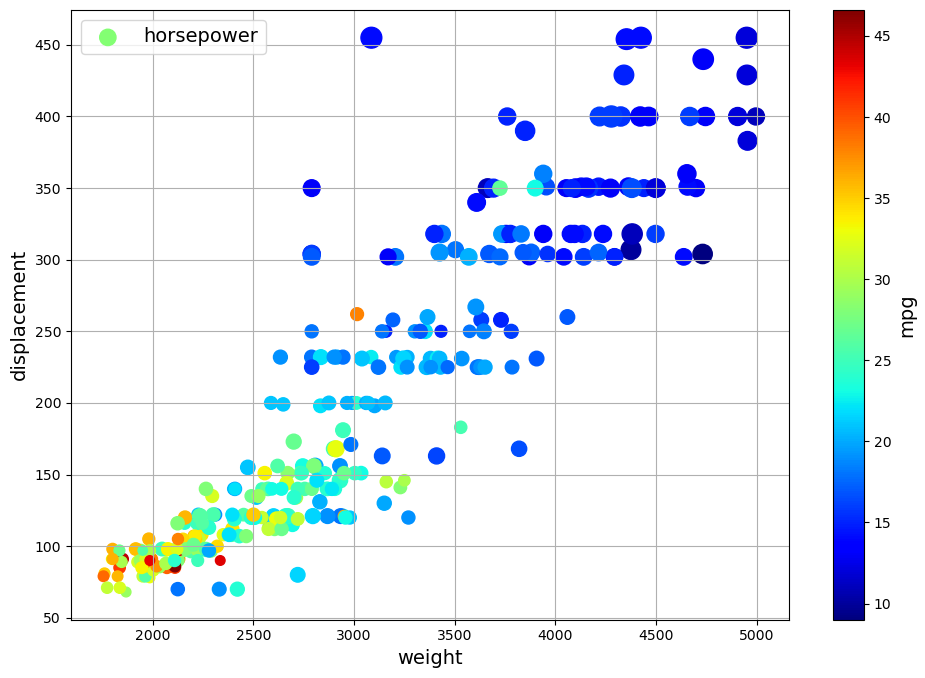

In [34]:
mpg.plot(kind="scatter", x="weight", y="displacement", grid=True,
         s=mpg["horsepower"], label="horsepower",
         c="mpg", cmap="jet", colorbar=True,
         legend=True, sharex=False, figsize=(10, 7))
save_fig("mpg_scatterplot")  # 그림 저장
plt.show()

**2. 상관 관계와 상관 계수**

In [35]:
#리스트에 데이터 삽입하기
model_year = mpg['model_year']
meter_per_gallen = mpg['mpg']

#리스트를 데이터프레임으로 변환하기
data = {'model_year':model_year, 'meter_per_gallen':meter_per_gallen}
df = pd.DataFrame(data)

#상관분석 수행하기
coef = df.corr(method='pearson')
print(coef)

                  model_year  meter_per_gallen
model_year          1.000000          0.588971
meter_per_gallen    0.588971          1.000000


In [36]:
#리스트에 데이터 삽입하기
weight = mpg['weight']
meter_per_gallen = mpg['mpg']

#리스트를 데이터프레임으로 변환하기
data = {'wieght':weight, 'meter_per_gallen':meter_per_gallen}
df = pd.DataFrame(data)

coef = df.corr(method='pearson')
print(coef)

                    wieght  meter_per_gallen
wieght            1.000000         -0.804786
meter_per_gallen -0.804786          1.000000


**3. 자동차 연비의 상관관계 조사**

In [37]:
corr_matrix = mpg.drop(columns=['origin']).corr()

In [38]:
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year
mpg,1.000000,-0.759901,-0.785561,-0.765892,-0.804786,0.418170,0.588971
cylinders,-0.759901,1.000000,0.949485,0.837243,0.873436,-0.514403,-0.353492
displacement,-0.785561,0.949485,1.000000,0.890745,0.912868,-0.549791,-0.377129
horsepower,-0.765892,0.837243,0.890745,1.000000,0.846755,-0.694067,-0.424774
weight,-0.804786,0.873436,0.912868,0.846755,1.000000,-0.406812,-0.290945
acceration,0.418170,-0.514403,-0.549791,-0.694067,-0.406812,1.000000,0.293419
model_year,0.588971,-0.353492,-0.377129,-0.424774,-0.290945,0.293419,1.000000


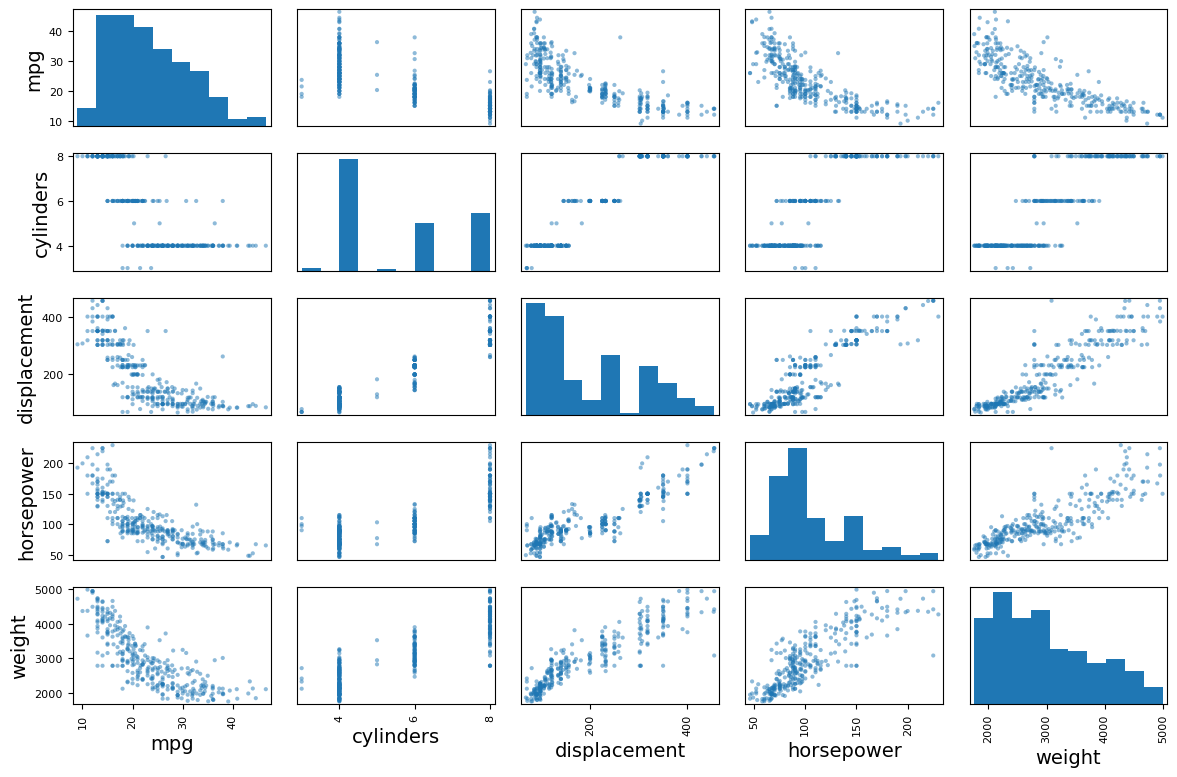

In [39]:
from pandas.plotting import scatter_matrix

attributes = ["mpg", "cylinders", "displacement",'horsepower',
              "weight"]
scatter_matrix(mpg[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [40]:
corr_matrix["mpg"].sort_values(ascending=False)

mpg             1.000000
model_year      0.588971
acceration      0.418170
cylinders      -0.759901
horsepower     -0.765892
displacement   -0.785561
weight         -0.804786
Name: mpg, dtype: float64

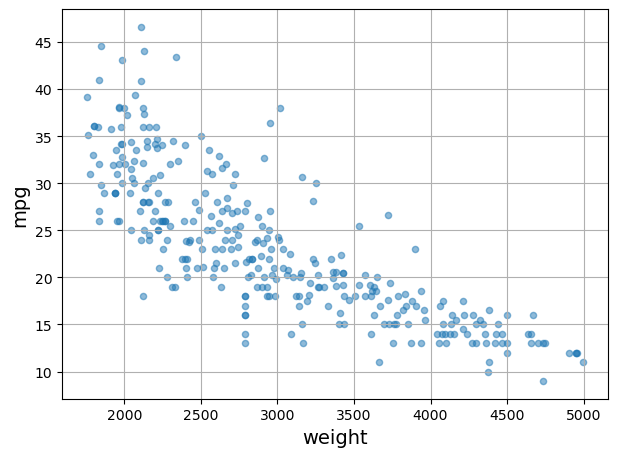

In [41]:
mpg.plot(kind="scatter", x="weight", y="mpg",
             alpha=0.5, grid=True)
save_fig("weight_vs_mpg_scatterplot")  # extra code
plt.show()

**4. 특성 조합으로 실험**

In [42]:
mpg["weight_per_cyl"] = mpg["weight"] / mpg["cylinders"]
mpg["weight_per_dis"] = mpg["weight"] / mpg["displacement"]
mpg["weight_per_horse"] = mpg["weight"] / mpg["horsepower"]

In [43]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceration,model_year,origin,weight_per_cyl,weight_per_dis,weight_per_horse
359,28.1,4,141.0,80,3230.0,20.4,81,EU,807.50,22.907801,40.375000
109,21.0,4,140.0,72,2401.0,19.5,73,USA,600.25,17.150000,33.347222
125,20.0,6,198.0,95,3102.0,16.5,74,USA,517.00,15.666667,32.652632
304,37.3,4,91.0,69,2130.0,14.7,79,EU,532.50,23.406593,30.869565
381,36.0,4,107.0,75,2205.0,14.5,82,JPN,551.25,20.607477,29.400000


In [44]:
corr_matrix = mpg.corr()
corr_matrix["mpg"].sort_values(ascending=False)

mpg                 1.000000
weight_per_dis      0.666539
model_year          0.588971
acceration          0.418170
weight_per_horse    0.259132
weight_per_cyl      0.017977
cylinders          -0.759901
horsepower         -0.765892
displacement       -0.785561
weight             -0.804786
Name: mpg, dtype: float64

**4~5주차 머신러닝 데이터 준비와 모델 선택**

**4 주차**

In [45]:
mpg = strat_train_set.drop("mpg", axis=1)
mpg_labels = strat_train_set["mpg"].copy()

**3. 특성 스케일링(Feature Scaling)**

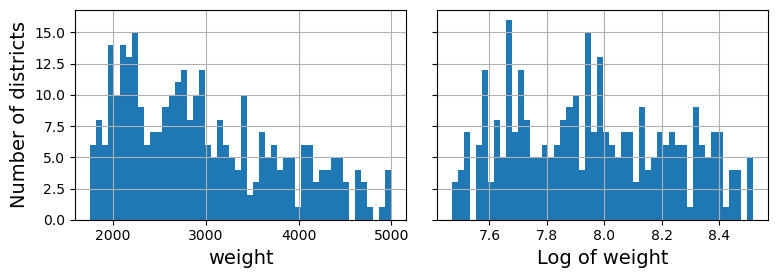

In [46]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
mpg["weight"].hist(ax=axs[0], bins=50)
mpg["weight"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("weight")
axs[1].set_xlabel("Log of weight")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

**5주차**

**5. 변환 파이프라인(Transformation Pipelines)**

In [47]:
import sklearn
sklearn.set_config(display="diagram")

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn import set_config

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [50]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [51]:
# <코드 4-9>
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ['cylinders','displacement','horsepower','weight','acceration','model_year']
cat_attribs = ["origin"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [52]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [53]:
mpg_prepared = preprocessing.fit_transform(mpg)

In [54]:
mpg_prepared_fr = pd.DataFrame(
    mpg_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=mpg.index)
mpg_prepared_fr.head(2)

,pipeline-1__cylinders,pipeline-1__displacement,pipeline-1__horsepower,pipeline-1__weight,pipeline-1__acceration,pipeline-1__model_year,pipeline-2__origin_EU,pipeline-2__origin_JPN,pipeline-2__origin_USA
359,-0.862839,-0.512237,-0.640638,0.312028,1.758976,1.361748,1.0,0.0,0.0
109,-0.862839,-0.521890,-0.851122,-0.687892,1.430780,-0.856105,0.0,0.0,1.0


In [55]:
from sklearn.preprocessing import FunctionTransformer

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
    ("weight_per_horse", ratio_pipeline(), ["weight", "model_year"]),
    ("log", log_pipeline, ['weight']),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))], 
    remainder=default_num_pipeline)

In [56]:
mpg_prepared = preprocessing.fit_transform(mpg)
mpg_prepared.shape

(318, 10)

In [57]:
preprocessing.get_feature_names_out()

array(['weight_per_horse__weight', 'weight_per_horse__model_year',
       'log__weight', 'cat__origin_EU', 'cat__origin_JPN',
       'cat__origin_USA', 'remainder__cylinders',
       'remainder__displacement', 'remainder__horsepower',
       'remainder__acceration'], dtype=object)

In [58]:
mpg_prepared

array([[ 0.31202805,  1.3617477 ,  0.44308155, ..., -0.51223746,
        -0.64063752,  1.75897561],
       [-0.68789244, -0.85610515, -0.6403796 , ..., -0.52189   ,
        -0.85112207,  1.43078027],
       [ 0.15763743, -0.57887354,  0.29537319, ...,  0.03795757,
        -0.245979  ,  0.33679584],
       ...,
       [ 0.59547958,  1.3617477 ,  0.69963188, ...,  0.29857626,
        -0.50908468,  0.37326199],
       [ 0.81982845, -0.02441033,  0.89064042, ...,  0.29857626,
        -0.11442615,  0.77438961],
       [-0.32483325, -0.30164194, -0.20893781, ..., -0.57980527,
        -0.21966843, -0.7571886 ]])

**6. 모델 선택과 훈련**

**6.1 훈련 세트에서 훈련하고 평가하기**

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(mpg, mpg_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('weight_per_horse',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['weight', 'model_year']),
                                                 ('log',
                                                  Pipeline(...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002CEA9FA5C10>)])),
                ('linearregression', LinearRegression())])

In [60]:
test_features = strat_test_set.drop(['mpg'], axis=1, inplace=False)
test_labels=strat_test_set['mpg']
test_features

,cylinders,displacement,horsepower,weight,acceration,model_year,origin
268,4,119.0,97,2300.0,14.7,78,JPN
140,8,304.0,150,4257.0,15.5,74,USA
14,4,113.0,95,2372.0,15.0,70,JPN
263,6,231.0,165,3445.0,13.4,78,USA
309,4,98.0,76,2144.0,14.7,80,EU
...,...,...,...,...,...,...,...
143,4,97.0,78,2300.0,14.5,74,EU
49,4,122.0,86,2220.0,14.0,71,USA
77,4,121.0,76,2511.0,18.0,72,EU
37,6,232.0,100,3288.0,15.5,71,USA


In [61]:
mpg_predictions = lin_reg.predict(test_features)
mpg_predictions[:5]

array([29.37617754, 13.86473256, 21.6739155 , 18.93144862, 33.2541147 ])

In [62]:
test_labels[:5]

268    27.2
140    14.0
14     24.0
263    17.7
309    41.5
Name: mpg, dtype: float64

In [63]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(test_labels, mpg_predictions,
                              squared=False)
lin_rmse

2.745866359089447

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(mpg, mpg_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('weight_per_horse',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['weight', 'model_year']),
                                                 ('log',
                                                  Pipeline(...
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002CEA9FA5C10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [65]:
mpg_predictions = tree_reg.predict(test_features)

In [66]:
tree_rmse = mean_squared_error(test_labels, mpg_predictions,
                              squared=False)
tree_rmse

2.809782020015076

**6.2 교차 검증(Cross-Validation) 평가**

In [67]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, mpg, mpg_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [68]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      4.148115
std       0.839315
min       2.722132
25%       3.529748
50%       4.253791
75%       4.652454
max       5.256187
dtype: float64

In [69]:
lin_rmses = -cross_val_score(lin_reg, mpg, mpg_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      3.078532
std       0.457782
min       2.156829
25%       2.786604
50%       3.243898
75%       3.370285
max       3.630961
dtype: float64

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, mpg, mpg_labels,
                                scoring="neg_root_mean_squared_error", cv=10)



In [71]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      2.866238
std       0.742820
min       1.943349
25%       2.204156
50%       2.822300
75%       3.543654
max       3.793472
dtype: float64

In [72]:
forest_reg.fit(mpg, mpg_labels)
mpg_predictions = forest_reg.predict(test_features)
forest_rmse = mean_squared_error(test_labels, mpg_predictions,
                                 squared=False)
forest_rmse

2.2642939434843727

In [73]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'random_forest__max_features': [2, 3, 4]},
    {'random_forest__max_features': [3, 4, 5]},
    {'random_forest__max_features': [6, 7, 8]},
    {'random_forest__max_features': [9, 10, 11]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(mpg, mpg_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('weight_per_horse',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['weight',
                                                                          'model_...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002CEA9FA5C10>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [2, 3, 4]},
                         {'random_forest__max_features': [3, 4, 5]},
                         {'random_forest__max_features': [6, 7, 8]},
                         {'random_forest__max_features': [9, 10, 11]}],
             scoring='neg_root_mean_squared_error')

In [74]:
grid_search.best_params_

{'random_forest__max_features': 9}

In [75]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('weight_per_horse',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['weight', 'model_year']),
                                                 ('log',
                                                  Pipeline(step...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002CEAAC83DC0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=9, random_state=42))])

In [76]:
grid_search.best_score_

-3.012003337898456

In [77]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,0.188354,0.000611,0.005210,0.007369,9,{'random_forest__max_features': 9},-2.801392,-3.350039,-2.884579,-3.012003,0.241428,1
6,0.152897,0.010894,0.008840,0.006539,6,{'random_forest__max_features': 6},-2.856647,-3.296017,-2.895888,-3.016184,0.198519,2
7,0.161052,0.002921,0.012515,0.009158,7,{'random_forest__max_features': 7},-2.810083,-3.362354,-2.945744,-3.039394,0.234987,3
5,0.140641,0.011144,0.010418,0.007367,5,{'random_forest__max_features': 5},-2.832150,-3.410755,-2.913695,-3.052200,0.255713,4
8,0.185040,0.005964,0.000000,0.000000,8,{'random_forest__max_features': 8},-2.836878,-3.393904,-2.925925,-3.052236,0.244316,5


In [78]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(mpg, mpg_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('weight_per_horse',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['weight',
                                                                                '...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002CEA9FA5C10>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CEAACA7580>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [87]:
rnd_search.best_params_

{'random_forest__max_features': 9}

In [88]:
cv_res1 = pd.DataFrame(rnd_search.cv_results_)
cv_res1.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.189765,0.000419,0.005574,0.007882,9,{'random_forest__max_features': 9},-2.801392,-3.350039,-2.884579,-3.012003,0.241428,1
8,0.203373,0.015164,0.007563,0.006382,9,{'random_forest__max_features': 9},-2.801392,-3.350039,-2.884579,-3.012003,0.241428,1
7,0.147143,0.006455,0.005510,0.007793,5,{'random_forest__max_features': 5},-2.832150,-3.410755,-2.913695,-3.052200,0.255713,3
0,0.192794,0.016782,0.013987,0.002850,8,{'random_forest__max_features': 8},-2.836878,-3.393904,-2.925925,-3.052236,0.244316,4
4,0.174241,0.000645,0.015753,0.000114,8,{'random_forest__max_features': 8},-2.836878,-3.393904,-2.925925,-3.052236,0.244316,4


In [81]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.05, 0.13, 0.09, 0.  , 0.  , 0.  , 0.21, 0.3 , 0.19, 0.03])

In [82]:
feature_importances

array([0.04697943, 0.12724991, 0.09049449, 0.002401  , 0.00396801,
       0.002253  , 0.20778958, 0.29879128, 0.19046654, 0.02960675])

In [83]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.2987912800000376, 'remainder__displacement'),
 (0.2077895822258254, 'remainder__cylinders'),
 (0.19046654082456865, 'remainder__horsepower'),
 (0.1272499092112074, 'weight_per_horse__model_year'),
 (0.09049448927119148, 'log__weight'),
 (0.0469794328266121, 'weight_per_horse__weight'),
 (0.0296067531720482, 'remainder__acceration'),
 (0.003968012302886698, 'cat__origin_JPN'),
 (0.002401000298237416, 'cat__origin_EU'),
 (0.002252999867385004, 'cat__origin_USA')]

In [84]:
final_predictions = final_model.predict(test_features)

final_rmse = mean_squared_error(test_labels, final_predictions, squared=False)
print(final_rmse)

2.2485654482358326


In [85]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.70777588, 2.68246056])